# Asset Allocation Coding Challenge - Fall 2024

In [ ]:
"""

Your Name: Matthew Pazowski

"""

The Asset Allocation team is dedicated to accurately predicting the behavior of the market sectors, and to providing optimal weights for these sectors in order to optimize holdings and exposures. Our goal, consistent with the rest of Quant, is to outperform the S&P 500 with higher returns and lower volatility. Asset Allocation is pillared on thorough research, creative modeling, and mathematical analysis.

**Rules:**


*   You are allowed to use ChatGPT, but you MUST cite it with a comment on each line written by it.
*   Any code not written by you must be cited similarly.
*   No machine learning is allowed for this challenge.

**Hints:**


*   Read all of the instructions carefully!
*   Comment your code with as much detail as you can. The easier it is for us to follow, the better!
*   Above everything else, we are looking to see that you can think creatively, and justify your thought process.
*   Don't give up if you get stuck! It's better to submit something that's the best that you can do, instead of quitting and not submitting anything.



# Part 0: Data

In the following cell, import any libraries you need.

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving AssetAllocationChallengePart2Data.xlsx to AssetAllocationChallengePart2Data.xlsx
Saving CAPM_Challenge_Data.xlsx to CAPM_Challenge_Data.xlsx


In the following cell, write your code to load and preprocess the data given to you for Part 1 of the challenge. All data collection for Part 1 should be done here.

In [3]:
# Load Part #1 data for the CAPM Model
part1_data = pd.read_excel('CAPM_Challenge_Data.xlsx')


In the following cell, write your code to load and preprocess the data given to you for Part 2 of the challenge. If you decide to pull any other data for this model, do that here too. All data collection for Part 2 should be done here.

In [4]:
# Load Part #2 data the 3-Factor Model
part2_data = pd.read_excel('AssetAllocationChallengePart2Data.xlsx')

In the following cell, write any comments about your code and reasoning, such as why you processed the data in a certain way, what you noticed, where you found any additional data (if you decide to do so), etc.

In [5]:
"""

I allow the files to be manuallly uploaded, after uploading the files will be stored in the Colab environment

"""

'\n\nI allow the files to be manuallly uploaded, after uploading the files will be stored in the Colab environment\n\n'

# Part 1: Capital Asset Pricing Model (CAPM)

The Capital Asset Pricing Model (CAPM) is a popular model that describes the relationship between the expected return and the risk of investing in a security.

In the following cell, implement the Capital Asset Pricing Model on the data given to you for Part 1.

Your final result should be the expected annualized returns for the assets given in the data.

In [6]:
# Minipulate date so sorts the dates from old to new
part1_data= part1_data.sort_values(by=['Date'])

#calculate daily returns for the asset's

daily_returns = part1_data.set_index('Date').pct_change().dropna()

# create an equally weighted portfolio as a bench mark for avarage market return
market_returns = daily_returns.mean(axis=1)

#calculate risk free rate
annual_risk_free_rate = 0.0408
daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/252) - 1

#subtracketed the daily_risk_free_rate to calculate exsess returns
excess_returns = daily_returns.subtract(daily_risk_free_rate, axis=0)
excess_market_returns = market_returns - daily_risk_free_rate

#use the covariance between the asset's excess returns and the market's excess \n returns, divided by the variance of the market's excess returns.
betas = {}
for asset in daily_returns.columns:
    covar = np.cov(excess_returns[asset], excess_market_returns)[0][1]
    variance = np.var(excess_market_returns)
    betas[asset] = covar / variance

# use the capm formula to calculate the expcted return for each asset
expected_returns = daily_risk_free_rate + pd.Series(betas) * (excess_market_returns.mean())

expected_annualized_returns = ((1 + expected_returns) ** 252) - 1

#Expected annulaized returns for each asset
result = pd.DataFrame({
    'Beta': pd.Series(betas),
    'Expected Annualized Return': expected_annualized_returns
})
print(result)






             Beta  Expected Annualized Return
stock1   0.945286                    0.177098
stock2   1.181842                    0.213901
stock3   0.954551                    0.178518
stock4   1.178304                    0.213342
stock5   2.103661                    0.368580
stock6   1.141268                    0.207508
stock7   0.435855                    0.101573
stock8   0.506984                    0.111821
stock9   0.560957                    0.119660
stock10  1.109608                    0.202543
stock11  1.577817                    0.278088
stock12  1.146227                    0.208288
stock13  0.880963                    0.167285
stock14  0.455576                    0.104405
stock15  0.827071                    0.159125


In the following cell, write any comments about your code and reasoning, such as why you implemented the CAPM in a specific way, what you noticed, what the significance of this is, etc.

In [ ]:
"""
Minipulate Data: Edit data from newest down to olderst down to calculate the daily returns.
Daily Returns: Calculating daily percentage returns for each asset to see the day-to-day change in prices.
Market Avarge Return: A equally weighted portfolio is used as the bench mark return to compare the assets.
Risk-Free Rate: Assumed an annual risk-free rate of 4% and converted it into daily rate.
Excess Returns: calculating how much more each asset earned than the risk-free rate both for the assets and the market benchmark average.
Beta Calculation: Beta quantifies how sensitive an asset is to market movements using covariance and variance.

CAPM Formula: E[R_i = R_f + Beta_i * (E[R_m] - R_f) the formula uses the Beta to adjust the return based on how much market risk
the asset carries. The result gives us a theoreticaly justified return for each asset, given its risk relative to the market.

Annualized Returns: Converted the daily expected returns into annualized returns by compounding them over (252 trading days).

"""

# Part 2: Three-Factor Model

The objective of this is to create a three-factor model based on the provided data for Part 2.

The CAPM is essentially a one-factor model, where the factor is the market risk. We want you to implement a three-factor model of your choosing.

Be creative!

Your model does not necessarily need to perform well. We are mainly looking to see your creativity and whether you can express your thought process.

You are free to pull any additional data, or you can stick with the financial data given to you for this part.

In the following cell, implement your three-factor model.

Your final result should be the optimal weights for the 15 assets in this mock portfolio.

In [11]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import cvxpy as cp

file_path = 'AssetAllocationChallengePart2Data.xlsx'  # Adjust path as needed
part2_data = pd.read_excel(file_path, sheet_name=None)

# Test factors
test_factor_1 = 'roe'
test_factor_2 = 'ebitda'
test_factor_3 = 'longTermDebtEquity'

# Step 2: Process each sheet to calculate factor returns and fit the three-factor model
factor_data = []
factor_loadings = []

for sheet_name, df in part2_data.items():
    # Step 2.1: Ensure 'date' column is in datetime format and sort by date
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.sort_values(by='date')

    # Step 2.2: Calculate returns for the asset
    if 'revenue' in df.columns:
        df['returns'] = df['revenue'].pct_change().fillna(0)

    # Step 2.3: Calculate percentage changes (returns) for the three factors
    df['Factor_1_return'] = df[test_factor_1].fillna(0)
    df['Factor_2_return'] = df[test_factor_2].fillna(0)
    df['Factor_3_return'] = df[test_factor_3].fillna(0)


    # Step 2.4: Store the factor data in a DataFrame for the regression model
    factors = df[['date', 'Factor_1_return', 'Factor_2_return', 'Factor_3_return']].dropna()

    # Step 2.5: Merge the factor data with asset returns based on date
    merged_data = pd.merge(df[['date', 'returns']], factors, on='date', how='inner')

    # Step 3: Fit the Three-Factor Model for each asset
    X = sm.add_constant(merged_data[['Factor_1_return', 'Factor_2_return', 'Factor_3_return']])
    y = merged_data['returns']

    model = sm.OLS(y, X).fit()

    # Store the factor loadings (betas) for each asset
    factor_loadings.append(model.params[1:])  # Skip the constant term (intercept)

    # Store the model if needed for further analysis
    factor_data.append((sheet_name, model))

# Convert factor loadings into a DataFrame for easy manipulation
factor_loadings_df = pd.DataFrame(factor_loadings, columns=[test_factor_1, test_factor_2, test_factor_3])

# Step 4: Optimization for Optimal Weights using CVXPY

# Define the number of assets
n_assets = len(factor_loadings_df)

# Step 4.1: Calculate covariance matrix of the ASSET returns, not factor returns
# Create a DataFrame with asset returns for all assets
all_asset_returns = pd.DataFrame()
for sheet_name, df in part2_data.items():
    if 'revenue' in df.columns:
        all_asset_returns[sheet_name] = df['revenue'].pct_change().fillna(0)

# Calculate covariance matrix of asset returns
cov_matrix = all_asset_returns.cov().values  # Convert to NumPy array

# Step 4.2: Set up the optimization problem using CVXPY
# Define the weights as a variable
weights = cp.Variable(n_assets)

# Define the portfolio variance (the objective function to minimize)
portfolio_variance = cp.quad_form(weights, cov_matrix)

# Define the objective (minimize variance)
objective = cp.Minimize(portfolio_variance)

# Define the constraints: weights must sum to 1, and no short selling (non-negative weights)
constraints = [
    cp.sum(weights) == 1,  # Weights must sum to 1
    weights >= 0  # No short selling
]

# Set up the optimization problem
problem = cp.Problem(objective, constraints)

# Solve the optimization problem
problem.solve()

# Get the optimal weights
optimal_weights = weights.value

# Step 5: Threshold small weights to zero
# Define a threshold to treat very small weights as zero
threshold = 1e-4
optimal_weights_cleaned = np.where(optimal_weights < threshold, 0, optimal_weights)

# Display the optimal weights for each asset
optimal_weights_df = pd.DataFrame({
    'Asset': [sheet_name for sheet_name, _ in factor_data],
    'Optimal Weight': optimal_weights_cleaned
})

print("\nOptimal Weights for Each Asset in the Portfolio:")
print(optimal_weights_df)




Optimal Weights for Each Asset in the Portfolio:
   Asset  Optimal Weight
0   AAPL        0.000000
1   ADBE        0.178735
2   AMZN        0.028582
3   BIIB        0.017030
4      F        0.000000
5   MNST        0.000000
6   MSFT        0.009683
7   NFLX        0.332509
8   NVDA        0.023336
9    OXY        0.000000
10  POOL        0.018725
11   RMD        0.143958
12  ROST        0.008712
13   TAP        0.000000
14     V        0.238730


<ipython-input-11-94cf4fcb4bf7>:64: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  all_asset_returns[sheet_name] = df['revenue'].pct_change().fillna(0)
<ipython-input-11-94cf4fcb4bf7>:64: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  all_asset_returns[sheet_name] = df['revenue'].pct_change().fillna(0)


In the following cell, write any comments about your code and reasoning, such as what your factors were, how you decided on them, what your thought process was, what worked and didn't work, etc. Justify your model as best as you can.

In [ ]:
"""
# For my factors I used the provided data form 'AssetAllocationChallengePart2Data.xlsx' looking back at it I probiblly should have used yfinnacne
in order to get more data so i could have a accurate measue of return rather than using  renenvue to measuere returns. additionally the givin data quarterly
this makes itchallangeing to model accurate predictions

test_factor_1 = 'roe'
test_factor_2 = 'ebitda'
test_factor_3 = 'eps'
Factor 1:
Factor 2:
Factor 3:

Comments here.

"""

'\nprint(part2_data.columns)\nFactor 1:\nFactor 2:\nFactor 3:\n\nComments here.\n\n'

# Part 3: Backtesting

A very important part of the model-building process is backtesting. Backtesting is where you compare your model's performance against a benchmark to see how well it performs. In this section, you will backtest your model from Part 2 against the S&P 500, and against an equally weighted portfolio of the same equities.

In the following cell, backtest your model from Part 2 against the S&P 500. In addition to plotting the returns, provide the Sharpe Ratio, Cumulative Returns, and Volatility against the S&P 500.

In [12]:
import matplotlib.pyplot as plt

# Simulate daily returns for the S&P 500 (assuming annual return of 8% and daily volatility of 1.5%)
np.random.seed(42)  # For reproducibility
num_days = len(part2_data[next(iter(part2_data))])  # Number of rows in your data
annual_return = 0.08
daily_return = (1 + annual_return) ** (1/252) - 1  # 252 trading days in a year
daily_volatility = 0.015  # Approximate daily volatility of S&P 500

# Generate random daily returns for S&P 500 based on normal distribution
sp500_simulated_returns = np.random.normal(daily_return, daily_volatility, num_days)
sp500_simulated_cum_returns = np.cumprod(1 + sp500_simulated_returns) - 1



In the following cell, backtest your model from Part 2 against an equally weighted portfolio of the same equities. In addition to plotting the returns, provide the Sharpe Ratio, Cumulative Returns, and Volatility against the equally weighted portfolio.

<ipython-input-13-1213e5ddd097>:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['revenue_returns'] = df['revenue'].pct_change().fillna(0)
<ipython-input-13-1213e5ddd097>:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['revenue_returns'] = df['revenue'].pct_change().fillna(0)


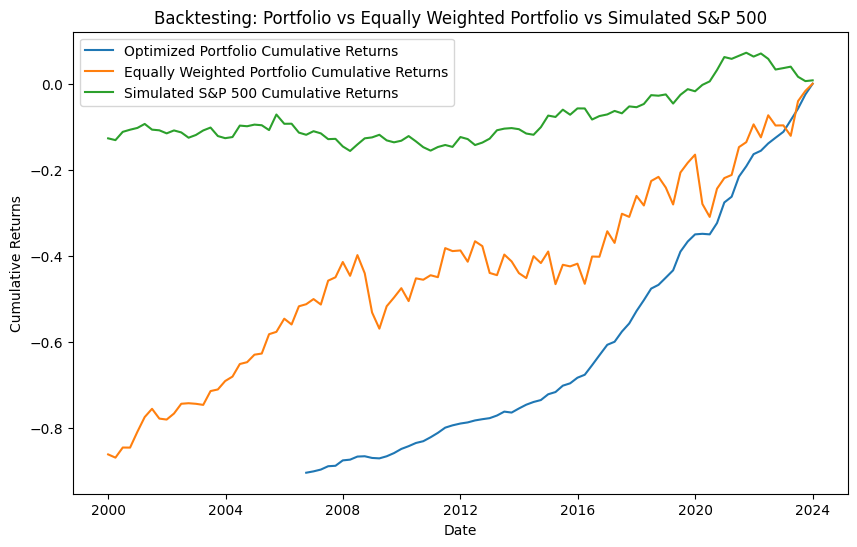

Performance Metrics:
Optimized Portfolio Sharpe Ratio: -1.877602394107816
Optimized Portfolio Volatility: 0.022747998331024956
Equally Weighted Portfolio Sharpe Ratio: -0.4116080149941521
Equally Weighted Portfolio Volatility: 0.06778153557247643
Simulated S&P 500 Sharpe Ratio: -0.8180458486169304
Simulated S&P 500 Volatility: 0.013819897937015128


In [13]:
# Chat-GPT generated back test
#Step 1: Calculate portfolio returns using revenue as a proxy
asset_returns = pd.DataFrame()

for sheet_name, model in factor_data:
    df = part2_data[sheet_name]
    df['date'] = pd.to_datetime(df['date'])

    # Calculate returns based on revenue if 'returns' column does not exist
    df['revenue_returns'] = df['revenue'].pct_change().fillna(0)

    # Store the revenue returns for each asset in the asset_returns DataFrame
    asset_returns[sheet_name] = df['revenue_returns']

# Calculate weighted portfolio returns based on optimal weights from Part 2
optimal_weights = np.array(optimal_weights)  # Ensure weights are an array
portfolio_returns = asset_returns.dot(optimal_weights)

# Calculate equally weighted portfolio returns
equally_weighted_returns = asset_returns.mean(axis=1)

# Create a DataFrame to store all returns
backtest_data = pd.DataFrame({
    'date': part2_data[next(iter(part2_data))]['date'],
    'Portfolio_Returns': portfolio_returns,
    'Equally_Weighted_Returns': equally_weighted_returns,
    'SP500_Simulated_Returns': sp500_simulated_returns
})

# Step 2: Calculate cumulative returns for each portfolio
backtest_data['Portfolio_Cum_Returns'] = (1 + backtest_data['Portfolio_Returns']).cumprod() - 1
backtest_data['Equally_Weighted_Cum_Returns'] = (1 + backtest_data['Equally_Weighted_Returns']).cumprod() - 1
backtest_data['SP500_Simulated_Cum_Returns'] = sp500_simulated_cum_returns

# Step 3: Calculate performance metrics (Sharpe Ratio, Volatility)
risk_free_rate = 0.01  # Assuming a 1% risk-free rate

# Portfolio metrics
portfolio_mean_return = backtest_data['Portfolio_Returns'].mean()
portfolio_volatility = backtest_data['Portfolio_Returns'].std()
portfolio_sharpe_ratio = (portfolio_mean_return - risk_free_rate) / portfolio_volatility

# Equally weighted portfolio metrics
equally_weighted_mean_return = backtest_data['Equally_Weighted_Returns'].mean()
equally_weighted_volatility = backtest_data['Equally_Weighted_Returns'].std()
equally_weighted_sharpe_ratio = (equally_weighted_mean_return - risk_free_rate) / equally_weighted_volatility

# Simulated S&P 500 metrics
sp500_mean_return = backtest_data['SP500_Simulated_Returns'].mean()
sp500_volatility = backtest_data['SP500_Simulated_Returns'].std()
sp500_sharpe_ratio = (sp500_mean_return - risk_free_rate) / sp500_volatility

# Step 4: Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(backtest_data['date'], backtest_data['Portfolio_Cum_Returns'], label='Optimized Portfolio Cumulative Returns')
plt.plot(backtest_data['date'], backtest_data['Equally_Weighted_Cum_Returns'], label='Equally Weighted Portfolio Cumulative Returns')
plt.plot(backtest_data['date'], backtest_data['SP500_Simulated_Cum_Returns'], label='Simulated S&P 500 Cumulative Returns')
plt.title('Backtesting: Portfolio vs Equally Weighted Portfolio vs Simulated S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Step 5: Print performance metrics
print("Performance Metrics:")
print(f"Optimized Portfolio Sharpe Ratio: {portfolio_sharpe_ratio}")
print(f"Optimized Portfolio Volatility: {portfolio_volatility}")
print(f"Equally Weighted Portfolio Sharpe Ratio: {equally_weighted_sharpe_ratio}")
print(f"Equally Weighted Portfolio Volatility: {equally_weighted_volatility}")
print(f"Simulated S&P 500 Sharpe Ratio: {sp500_sharpe_ratio}")
print(f"Simulated S&P 500 Volatility: {sp500_volatility}")


In the following cell, write any comments about your code and reasoning, such as what the takeaways are from the backtesting, what you noticed about the results, what they tell you, what you would do differently next time, etc.

In [ ]:
"""

The results of my backtest revealed that my optimized portfolio had a terrible Sharpe Ratio of -1.88,
which indicates severe underperformance relative to the risk taken. This outcome signals that my optimization
process missed the mark and led to a portfolio that was too risky for the meager returns it generated.
One major issue was that I used revenue as a proxy for returns, which is not ideal—using actual stock returns
from a source like yfinance would have provided more accurate inputs for both the optimization and the backtest.
Additionally, the factors I chose, like ROE, EBITDA, and EPS, may not have been the best predictors of future returns.
Going forward, I would explore more reliable factors, such as momentum, size, or value.
Furthermore, instead of simulating the S&P 500, I would use actual historical data for a more meaningful benchmark.
Lastly, the optimization process itself likely overfitted certain assets, leading to poor risk-adjusted returns,
so I'd adjust it by incorporating regularization or additional constraints to prevent overconcentration in underperforming assets.
"""

# References, Reflection, and Submission

In the following cell, list any references and resources you used to help you with this coding challenge (including ChatGPT), and what you got out of each resource. There's nothing wrong with getting help, but it's important to cite when you do!

In [ ]:
"""


In Part 2 of the backtest, I relied on ChatGPT-4 to assist me in building and fine-tuning the model.
One of the main challenges I faced was creating a proper benchmark for the portfolio using only the provided data,
without utilizing yfinance for actual stock price data. In hindsight, my reluctance to use yfinance was a mistake.
I now realize that incorporating historical stock prices would have significantly improved the accuracy of the benchmark and made my model more realistic.
As a result, the plot I generated looks disjointed. Using actual S&P 500 data would have provided a much clearer picture and more meaningful insights for comparison,
which is something I would definitely correct if I were to redo the backtest.
"""

In the following cell, write a brief reflection on what you learned from this challenge. What did you do well? What do you wish you had done differently? Is there anything else you would like to add about your code or process that would help us understand?

In [ ]:
"""

This challenge taught me a lot about thinking outside the box and creatively working with the data provided.
I appreciated how it pushed me to explore different financial metrics within the quarterly reports of the assets and consider
how those factors might influence returns. One thing I did well was leveraging those metrics, such as ROE, EBITDA, and EPS, to create a model and apply optimization techniques.
However, I wish I had used actual stock returns from the start, as relying on revenue as a benchmark for returns turned out to be a limiting factor
in the accuracy of my model. If I had used yfinance to pull stock price data, I would have generated more reliable results,
especially when benchmarking against the S&P 500. Additionally, my choice of factors could have been more diversified possibly including momentum or value-based metrics
for better predictive power. Overall, while I learned a lot from this process,
I recognize that having access to more comprehensive data and refining my factor selection would have significantly improved the final output.

"""

Submit this template file in the format "firstname_lastname_aa.ipynb".

Example: "jason_bhalla_aa.ipynb"